In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Discussion Related With Outliers And Impact On Machine Learning!!

#### Which Machine LEarning Models Are Sensitive To Outliers?

1.  Naivye Bayes Classifier -------- Not Sensitive To Outliers
2.  SVM -------- Not Sensitive To Outliers
3.  Linear Regression ---------- Sensitive To Outliers
4.  Logistic Regression ------- Sensitive To Outliers
5.  Decision Tree Regressor or Classifier ---- Not Sensitive
6.  Ensemble(RF,XGboost,GB) ------- Not Sensitive
7.  KNN --------------------------- Not Sensitive
8.  Kmeans ------------------------ Sensitive
9.  Hierarichal ------------------- Sensitive
10. PCA -------------------------- Sensitive
11. Neural Networks -------------- Sensitive

In [4]:
df = pd.read_csv("data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

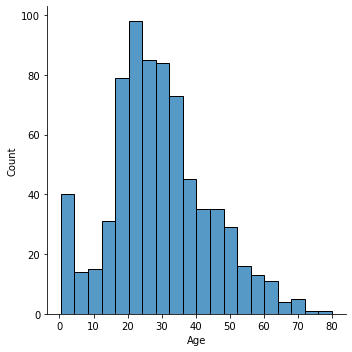

In [7]:
# Check type of distribution and outliers during dropna()

sns.displot(df['Age'].dropna())

# it is a normal distribution 

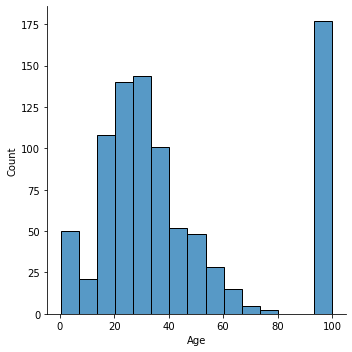

In [8]:
# Check type of distribution and outliers during fillna() 

sns.displot(df['Age'].fillna(100))

Text(0, 0.5, 'No of passenger')

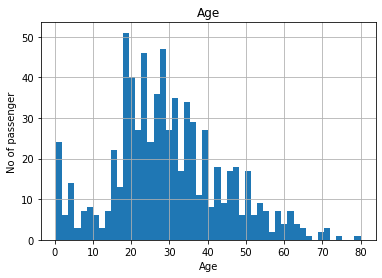

In [10]:
# Check if there are outliers without affecting NaN values (no dropna() or fillna())
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

# distribution is normal/guassian distribution

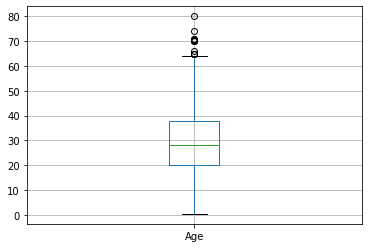

In [12]:
# Identify the Outliers 

figure = df.boxplot(column="Age")

# The points in the box plot (from 65 to 80) --> outliers

In [13]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## 1) Technique: If The Data Is Normally/Gaussian Distributed, We use this

Assuming Age follows A Gaussian Distribution we will **calculate the boundaries which differentiates the outliers**

In [16]:
upper_boundary = df['Age'].mean() + 3 * df['Age'].std() # 3rd standard deviation
lower_boundary = df['Age'].mean() - 3 * df['Age'].std()
print(lower_boundary), print(upper_boundary), print(df['Age'].mean())

# in Age, -ve value will not be there

-13.880374349943303
73.27860964406094
29.69911764705882


(None, None, None)

In [19]:
### Lets compute the interquartile range to calculate the boundaries 

# IQR = 75th percentile - 25th percentile
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
IQR

# Any point outside the IQR range is identified as an outlier

17.875

In [20]:
# from 25% percentile, subtract IQR -- 1.5 to the left
# from 75% percentile, add IQR -- 1.5 to the right

lower_bridge = df['Age'].quantile(0.25)-(IQR * 1.5)
upper_bridge = df['Age'].quantile(0.75)+(IQR * 1.5)
print(lower_bridge), print(upper_bridge)

# For Extreme outliers --> IQR*3

-6.6875
64.8125


(None, None)

**Conclusion:** max value was 80.0. After deduction, anything above 64.8125 is an outlier

## 2) Technique: If Features are Skewed, We use this

Text(0, 0.5, 'No of passenger')

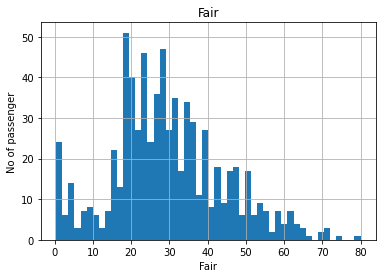

In [21]:
# Check if there are outliers without affecting NaN values (no dropna() or fillna())

figure=df.Age.hist(bins=50)
figure.set_title('Fair')
figure.set_xlabel('Fair')
figure.set_ylabel('No of passenger')

# Dataset over here is Skewed

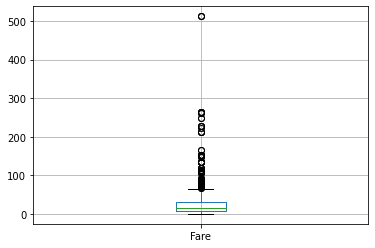

In [23]:
# Identify the Outliers 

figure = df.boxplot(column="Fare")

# The points in the box plot --> outliers (Huge amount of outliers)

In [25]:
df['Fare'].describe()

# difference between 75% percentile and max is huge, so there are a lot of outliers

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [26]:
### Lets compute the Interquantile range to calculate the boundaries
IQR = df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)
IQR

23.0896

In [29]:
# For skewed dataset - both left skewed and right skewed, we will consider extreme outliers

lower_bridge = df['Fare'].quantile(0.25)-(IQR * 3)
upper_bridge = df['Fare'].quantile(0.75)+(IQR * 3)
print(lower_bridge), print(upper_bridge)

# we are getting 100, this is fairly good

-61.358399999999996
100.2688


(None, None)

## Now that we have gotten the outliers, how do we remove them from the dataset? 
* before applying the dataset to a ML algorithm

In [35]:
new_df = df.copy()

In [36]:
# we know the outlier of 'Age' is 73.27860964406094

# if 'Age' amount is >=73, with respect to 'Age' feature, we will replace all outliers above 73.278 with 73
new_df.loc[new_df['Age']>=73,'Age'] = 73

In [37]:
# we know the outlier of 'Fair' is 100.2688

# if 'Fare' amount is >=100, with respect to 'Fare' feature, we will replace all outliers above 100.2688 with 100
new_df.loc[new_df['Fare']>=100,'Fare'] = 100

Text(0, 0.5, 'No of passenger')

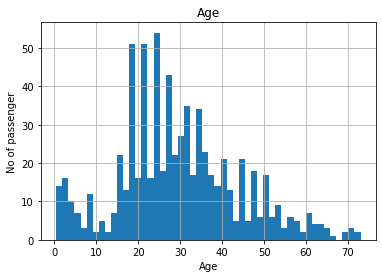

In [39]:
# Now lets see the new dataset

# Age

figure=new_df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

# Most points are 73

Text(0, 0.5, 'No of passenger')

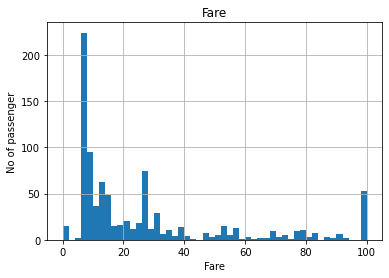

In [40]:
# Fare

figure=new_df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

# Most points are 100

In [43]:
# For now we will apply on a ml algorithm

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_df[['Age','Fare']].fillna(0),new_df['Survived'],test_size=0.3) 

# Feature Engineering applied as well

In [45]:
### Logistic Regression --> sensitive to outliers

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train) # Train model

# Test model
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

# Evaluation metrics
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1]))) # take all rows, and first column

Accuracy_score: 0.6529850746268657
roc_auc_score: 0.6420482073643411


In [46]:
# The format() method formats the specified value(s) and insert them inside the string's placeholder.

# The placeholder is defined using curly brackets: {}

# The format() method returns the formatted string.